In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
from gptchem.data import get_photoswitch_data
from gptchem.evaluator import  predict_photoswitch
from gptchem.gpt_classifier import GPTClassifier
from gptchem.extractor import ClassificationExtractor
from gptchem.tuner import Tuner
import matplotlib.pyplot as plt

import numpy as np 

In [3]:
data = get_photoswitch_data()
data = data.dropna(subset=['SMILES', 'E isomer pi-pi* wavelength in nm'])

(array([  3., 133.,  42.,  74.,  72.,  29.,  16.,  12.,   6.,   3.]),
 array([267. , 302.6, 338.2, 373.8, 409.4, 445. , 480.6, 516.2, 551.8,
        587.4, 623. ]),
 <BarContainer object of 10 artists>)

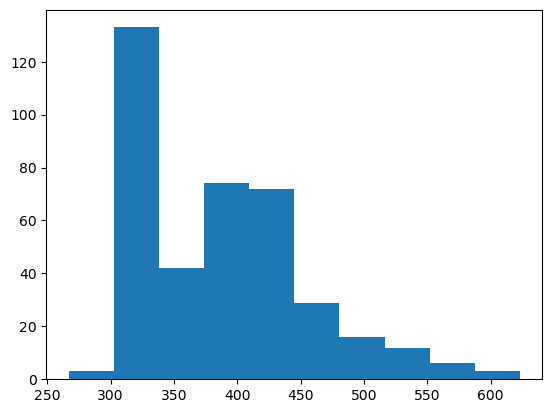

In [4]:
plt.hist(data['E isomer pi-pi* wavelength in nm'])

In [30]:
train_data = data[data['E isomer pi-pi* wavelength in nm'] < 400]
test_data = data[data['E isomer pi-pi* wavelength in nm'] >= 400]

In [39]:
train_median = train_data['E isomer pi-pi* wavelength in nm'].median()

train_binary_target =[1 if x < train_median else 0 for x in train_data['E isomer pi-pi* wavelength in nm']] 
test_binary_target = [1 if x < train_median else 0 for x in test_data['E isomer pi-pi* wavelength in nm']]


train_binary_target = np.array(train_binary_target)
test_binary_target = np.array(test_binary_target)

In [40]:
classifier = GPTClassifier('transition_wavelength', tuner=Tuner())

In [42]:
classifier.fit(train_data['SMILES'].values, train_binary_target)

Upload progress: 100%|██████████| 25.6k/25.6k [00:00<00:00, 41.7Mit/s]


Uploaded file from /Users/kevinmaikjablonka/git/kjappelbaum/gptchem/experiments/16_biased_inverse_design/out/20231008_111833/train.jsonl: file-1iBJofbbLeIhL9pPFstF5PXV
No fine-tune has been retrieved
None


In [43]:
predictions = classifier.predict(test_data['SMILES'].values[:10])

{'choices': ['0', '0', '1', '1', '1', '0', '1', '0', '0', '0'], 'logprobs': [None, None, None, None, None, None, None, None, None, None], 'model': 'ada:ft-personal-2023-10-08-09-59-33'}


In [44]:
predictions

(#10) [0,0,1,1,1,0,1,0,0,0]

In [46]:
test_binary_target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])